<a href="https://colab.research.google.com/github/amoghjalan/Optical-Character-Recognition/blob/main/OCR_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optical Character Recognition



In [1]:
# Importing necessory Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras import regularizers, optimizers
from keras.callbacks import ModelCheckpoint

from keras import backend as K

##Loading MNIST Dataset


In [5]:
# Dataset unzipped from Drive
! unzip "/content/drive/My Drive/Dataset/OCR/train.csv.zip"

Archive:  /content/drive/My Drive/Dataset/OCR/train.csv.zip
  inflating: train.csv               


In [6]:
#Loading training data in train_df
train_df = pd.read_csv("train.csv")

In [ ]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
data = train_df.values    # Converting the data from dataframe to a numpy array

X = data[:,1:]            # X has all the pixel values i.e from column 1 to last column
Y = data[:,0]             # Y has the labels of all the images 

print(X.shape,Y.shape)  

(42000, 784) (42000,)


In [20]:
split = int(0.8*X.shape[0])                                # Splitting the data in 80:20 ratio. 80 being train, 20 being test(validation)

X_train = X[:split,:].astype(np.float32)                   # Splitted X and converted the type of values to float of 32 bit
Y_train = Y[:split]                                        # Splitted Y

X_test = X[split:,:].astype(np.float32)                    # Splitted X and converted the type of values to float of 32 bit
Y_test = Y[split:]                                         # Splitted Y

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)     # Reshaped the image data from (784) to (28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)        # Reshaped the image data from (784) to (28,28,1)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(33600, 28, 28, 1) (33600,)
(8400, 28, 28, 1) (8400,)


In [21]:
X_train = X_train/255                                      # Standardized the pixel values
X_test = X_test/255                                        # Standardized the pixel values

Y_train = np_utils.to_categorical(Y_train, 10)             # Converted the labels as categorical variables
Y_test = np_utils.to_categorical(Y_test, 10)               # Converted the labels as categorical variables

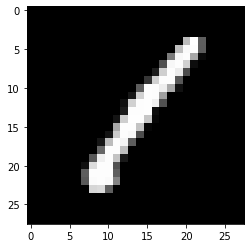

In [10]:
# Visualizing some images from the data
def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')    
    plt.show()  

drawImg(X_train[0])  

## Model

In [3]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [ ]:
checkpoint=ModelCheckpoint('/content/drive/My Drive/Dataset/OCR/MNISTmodel_weights.h5',monitor='val_loss',verbose=0,save_best_only=True,save_weights_only=True,mode='auto',period=1)

In [ ]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, callbacks=[checkpoint])

Epoch 1/10
168/168 [==============================] - 5s 27ms/step - loss: 0.3694 - accuracy: 0.8801 - val_loss: 0.0702 - val_accuracy: 0.9783
Epoch 2/10
168/168 [==============================] - 4s 26ms/step - loss: 0.0936 - accuracy: 0.9721 - val_loss: 0.0442 - val_accuracy: 0.9848
Epoch 3/10
168/168 [==============================] - 4s 26ms/step - loss: 0.0697 - accuracy: 0.9793 - val_loss: 0.0379 - val_accuracy: 0.9888
Epoch 4/10
168/168 [==============================] - 4s 25ms/step - loss: 0.0580 - accuracy: 0.9822 - val_loss: 0.0370 - val_accuracy: 0.9888
Epoch 5/10
168/168 [==============================] - 4s 25ms/step - loss: 0.0490 - accuracy: 0.9862 - val_loss: 0.0324 - val_accuracy: 0.9908
Epoch 6/10
168/168 [==============================] - 4s 26ms/step - loss: 0.0400 - accuracy: 0.9879 - val_loss: 0.0300 - val_accuracy: 0.9904
Epoch 7/10
168/168 [==============================] - 4s 25ms/step - loss: 0.0342 - accuracy: 0.9890 - val_loss: 0.0374 - val_accuracy: 0.9893

In [ ]:

model2 = Sequential()

model2.add(Conv2D(16, kernel_size = (5, 5), activation = "relu", padding = "Same", input_shape = (28,28,1), kernel_regularizer=regularizers.l1(0.01)))
model2.add(BatchNormalization())
model2.add(Conv2D(16, kernel_size = (5, 5), activation = "relu", padding = "Same", kernel_regularizer=regularizers.l1(0.01)))
model2.add(MaxPooling2D(pool_size = (3, 3)))
model2.add(Dropout(0.25))

model2.add(Conv2D(32, kernel_size = (3, 3), activation = "relu", padding = "Same", kernel_regularizer=regularizers.l1(0.01)))
model2.add(BatchNormalization())
model2.add(Conv2D(32, kernel_size = (3, 3), activation = "relu", padding = "Same", kernel_regularizer=regularizers.l1(0.01)))
model2.add(MaxPooling2D(pool_size = (3, 3)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(128,activation="relu"))
model2.add(Dropout(0.25))
model2.add(Dense(10, activation = "softmax"))

model2.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(1e-8), metrics=['accuracy'])

model2.summary()

In [ ]:
checkpoint=ModelCheckpoint('/content/drive/My Drive/Dataset/OCR/MNISTmodel2_weights.h5',monitor='val_loss',verbose=0,save_best_only=True,save_weights_only=True,mode='auto',period=1)

In [ ]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, callbacks=[checkpoint])

## Prediction

In [4]:
model.load_weights("/content/drive/My Drive/Dataset/OCR/MNISTmodel_weights.h5")     # Loaded best model Weights

In [ ]:
! unzip "/content/drive/My Drive/Dataset/OCR/test.csv.zip"                          # Unzipped test data

Archive:  /content/drive/My Drive/Dataset/OCR/test.csv.zip
  inflating: test.csv                


In [ ]:
test_df = pd.read_csv("test.csv")                                                   # Loaded test data

In [ ]:
test_data = test_df.values                                                          # Converted dataframe into numpy array

In [ ]:
# Prediction function
def predict_number(img):
  pred_img = np.resize(img,(1,28,28,1))                # Resixe the pixels from 784 to (1,28,28,1)
  pred = model.predict(pred_img)                       # Predicted the label 
  pred = pred.argmax()                                 # Converted predicted value from categorical variable to a number
  img = img.reshape((28,28))                           # For plotting the image
  plt.imshow(img,cmap='gray')    
  plt.show()
  print(pred)

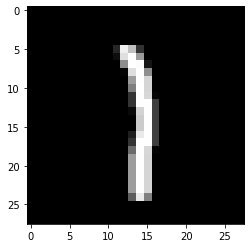

1


In [ ]:
predict_number(test_data[66])

In [ ]:
X= data[:, 1:]
Y= data[:, 0].
def accuracy(data, model):
  

In [11]:
X_test.shape[0]

8400

In [23]:
# Accuracy predictor
correct=0

for i in range(8400):
  img = X_test[i].reshape(1,28,28,1)
  pred = model.predict(img)
  pred = pred.argmax()
  if Y_test[i].argmax() == pred:
    correct += 1

accuracy = (correct/X_test.shape[0])*100
print(f"Accuracy={accuracy}")


Accuracy=99.20238095238095
